# Machine learning for psychologists: a gentle introduction

This is a tutorial on machine learning. The title says it's for psychologists, but all that really means is that (a) most of the examples involve psychology data, (b) there's almost no math, and (c) I assume that the reader has some familiarity with the kinds of inferential statistical methods commonly used in psychology. For the most part, the tutorial should be equally applicable to readers coming from other social and biomedical fields. On the rare occasion I make points relevant primarily to psychologists, I highlight that fact up front, so that other readers can shrug in disgust and skip the offending section.

### Overview and organization
This tutorial is organized into several Jupyter notebooks. A Jupyter notebook is a web application that lets you combine text (or HTML), code, figures, equations, interactive widgets, and more, all in one magical document. There are currently 6 notebooks in total; each one provides an introductory look at a different topic in machine learning. The coverage is by no means exhaustive; the goal is simply to provide a high-level overview of a number of key machine learning concepts and practices.

This tutorial borrows liberally from a number of others—most notably, from Jake Vanderplas's excellent [scikit-learn tutorial](https://github.com/jakevdp/sklearn_tutorial). The main difference is that the present tutorial is meant as a gentle conceptual overview of machine learning, and not as an introduction to how machine learning is done in Python or scikit-learn. This means that, in places, the code is likely to be opaque to readers who don't have much prior programming experience (either with Python in particular, or with other languages). That's okay. While I've tried to comment the code liberally, the text will mostly treat the code cells as blackboxes: I'll explain what goes in (and why), and what comes out (and why), but if you ignore the code in favor of the text and figures, you will hopefully still come out with a basic grasp on core machine learning principles.

That said, one benefit of the Jupyter notebook format is that it's easy to interact with the code. To facilitate this, I've tried to put key parameters that you're encouraged to modify in constants (you'll recognize them by the fact that the variable names are all `UPPERCASE`) at the top of each cell. When you see something like `N = 30`, feel free to change it to `N = 300` and re-run the cell to see what effect it has on the generated plots or results.

While most of the code is included in the tutorial notebooks themselves, in a few cases where the code is particularly long, I've abstracted it into helper functions in the `support/` folder. This is to maximize clarity, but you can always go and take a look if you want to see the details.

### Software
All of the code in this tutorial is written in Python. There is nothing intrinsically special about Python in the machine learning context; in principle, all of the examples and simulations in these notebooks could have been written in other languages (R, Matlab, etc.). Indeed, there are plenty of machine learning tutorials out there written in other languages.

That said, Python does have a number of practical advantages over other languages. Chief among these is the fact that it's currently by far the most widely used language in the data science and machine learning community. This means there are exceptional tools written in Python for virtually every domain of machine learning. Exhibit A is the `scikit-learn` package for machine learning, which we'll rely on heavily throughout this tutorial. Scikit-learn is the world's most widely used machine learning, and some of the reasons for its popularity will hopefully soon become clear. Scikit-learn is itself built on the [numpy](https://www.numpy.org) numerical computing library, which we'll also use fairly regular.

### Data
Rather than relying strictly on simulated data and/or the infamous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), we'll use data that should be of interest to at least some psychologists—namely, personality questionnaire data from [Johnson (2014)](http://www.personal.psu.edu/faculty/j/5/j5j/papers/JRP2014.pdf). The dataset consists of internet-based responses from over 300,000 people to a 300-item personality questionnaire—the IPIP representation of the NEO-PI-R. The NEO-PI-R is one of the most widely used measures of the Big Five. You've probably heard of the Big Five at least indirectly even if you're not a personality psychologist. If you've ever heard someone mumble something like "no I don't want to go out right now; don't you know I'm an introvert?", you're in the right ballpark.

The citation for the data, in case you end up wanting to use it for anything else, is:

> Johnson, J. A. (2014). Measuring thirty facets of the five factor model with a 120-item public domain inventory: Development of the IPIP-NEO-120. Journal of Research in Personality, 51, 78-89.

The original data is available in SPSS format [here](https://osf.io/wxvth/files/). But because SPSS is evil, I've taken the small liberty of bundling this repo with a plaintext, tab-delimited version of the file. This will make our life much easier when reading the data in. I've also taken the somewhat bigger liberty of dropping all rows that contain at least one missing response. Normally, listwise deletion isn't an ideal thing to do, but our goal here is to introduce core machine learning principles, not to draw generalizable inferences about personality. So we're going to opt for expediency.

With that out of the way, let's read in and look at the data. It's a pretty big dataset (~145,000 rows), so expect this to take a few seconds.

In [1]:
# We begin by importing the pandas package, which we'll use extensively
# for data manipulation. In future sections, we'll put the core imports
# at the top of the notebook, which is the convention in Python.
import pandas as pd

# read_csv is a workhorse function that can read almost any kind of
# plain-text format. The returned object is a pandas DataFrame.
all_data = pd.read_csv('data/Johnson-2014-IPIP-300.tsv.gz', sep='\t')

# head() display the first few rows of the dataset.
all_data.head()

,CASE,SEX,AGE,SEC,MIN,HOUR,DATE,MONTH,YEAR,COUNTRY,...,Self-Discipline,Self-Efficacy,Sympathy,Trust,Vulnerability,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
0,4,2,36,44,11,10,31,0,101,USA,...,4.2,5.0,4.0,4.1,1.1,1.483333,3.850000,4.300000,4.400000,4.48
1,6,1,17,28,23,10,31,0,101,UK,...,2.2,3.7,2.8,3.5,2.5,2.566667,3.566667,3.233333,3.000000,3.18
2,9,2,28,0,30,10,31,0,101,Denmark,...,2.7,4.2,4.0,4.7,1.9,2.283333,2.983333,4.350000,3.983333,3.32
3,11,1,17,36,36,10,31,0,101,Singapore,...,3.6,3.0,4.2,4.2,3.3,3.250000,2.416667,2.716667,4.200000,3.70
4,15,2,48,34,49,10,31,0,101,USA,...,3.9,4.0,4.4,3.1,3.2,3.416667,3.066667,3.566667,3.900000,4.20


The original data consist of 310 columns: 10 demographic and contextual variables (sex, age, country, etc.) and 300 individual items, where each response is on a 5-point likert scale (reverse-keyed items have already been reversed). For example, here's the response distribution for the 100th item:

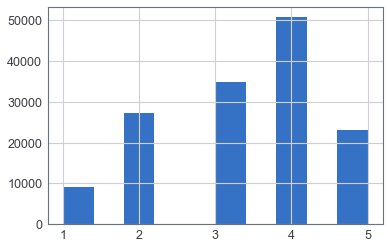

In [2]:
### tells the jupyter notebook to display plots in-line
%matplotlib inline

all_data['I100'].hist();

The cleaned-up version of the data I've provided here supplements the demographic and item variables with 30 facet score and 5 domains. The 30 facets are supposed to represent relatively narrow personality traits; each is scored by averaging 10 of the 300 items. The facet scores, in turn, can be averaged (in groups of 6) to form the canonical Big Five constructs—Neuroticism, Extraversion, Openness, Agreeableness, and Conscientiousness.

#### Easier data retrieval
A lot of our analyses are going to make use of different subsets of the overall dataset. In particular, we'll frequently want to (a) sample subsets of rows, and (b) compare different sets of predictors (e.g., the 5 domains, 30 facets, and 300 individual items). To save ourselves from having to write the same subsetting code over and over, let's abstract it into a small helper function (in the other notebooks, we'll import the same function from our `support/` module).

In [3]:
def get_features(data, *args, n=None):
    ''' Return specified features or feature groups for a subsample.
    
    Args:
        data (DataFrame): DataFrame to subsample.
        args (list): Positional args containing the names of
            variables/groups to return. Each element must be one of
            'domains', 'facets', 'items', or the name of an existing
            column.
        n (int): Number of cases to return. If None, keeps all rows.

    Returns: A list of pandasDataFrames and/or Series, in the same
        order as *args.
    '''

    if n is not None:
        data = data.sample(n)

    results = []

    for name in args:
        if name == 'domains':
            results.append(data.iloc[:, -5:])
        elif name == 'facets':
            results.append(data.iloc[:, -35:-5])
        elif name == 'items':
            results.append(data.iloc[:, -335:-35])
        else:
            results.append(data[name])

    return results

For example, to get just the Big Five domain scores for 1000 random rows:

In [4]:
# Note that get_features() always returns a list, so when
# there's only a single requested object, we index with [0].
domains = get_features(all_data, 'domains', n=1000)[0]

# Display first few rows
domains.head()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness
25399,2.900000,2.400000,3.266667,3.600000,3.54
28162,2.950000,3.900000,4.333333,3.500000,3.62
90051,2.750000,3.516667,3.966667,3.333333,3.74
97721,2.033333,4.183333,3.533333,3.683333,4.62
68337,3.550000,3.400000,4.100000,3.900000,3.42


Now we have some features! If you're wondering what the hell a "feature" is, fear not—it's just machine learning-speak for "variable".

#### A suitable outcome
For most of this tutorial, we'll be using personality scores as the features in our predictive models. Of course, we also need something *to* predict. Fortunately, the Johnson (2014) dataset includes a number of basic demographic variables. We'll mostly focus on age, which is a nice target for prediction, because we might intuitively expect there to be systematic relationships between people's age and their self-reported personality scores. Let's confirm this:

In [5]:
# Get domain scores and age and assign to variables
domains, age = get_features(all_data, 'domains', 'AGE')

# Pearson correlation between columns in domains and age
domains.corrwith(age).round(2)

Neuroticism         -0.12
Extraversion        -0.12
Openness             0.01
Agreeableness        0.16
Conscientiousness    0.25
dtype: float64

Four out of 5 of the Big Five dimensions are non-trivially correlated with age, and the relationship with conscientiousness is particularly robust.